# Hypergeometric Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
import scipy
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_discrete_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(xmin, xmax + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [3]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [4]:
def plot_discrete_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pmf = f.pmf(x_axis, **kwargs)
    fig, ax = plt.subplots(figsize = (8, 4))
    bars = ax.bar(x_axis, pmf, edgecolor = "k", linewidth = 2)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    print("-" * 10)
    if obs:
        plt.setp(bars[obs - x_axis.min()], color = "r", linewidth = 2)
        plt.setp(bars[obs - x_axis.min()], edgecolor = "k")
        obs_pmf = f.pmf(obs, **kwargs)
        print(f"PMF({obs}) = {obs_pmf}")
        
    plt.xticks(get_discrete_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_discrete_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_discrete_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

Si parte da $n$ *Bernoulli trial* senza *replacement*. L'insieme di tutti i possibili *outcome* dell'esperimento è pari ad $M$, dove $N$ di questi sono *outcome* di successo, mentre i restanti $M-N$ sono considerati non di successo. Siamo interessati a calcolare la probabilità di ottenere esattamente $x$ successi in $n$ *trials*, a prescindere dall'ordine in cui si verificano.

Questa probabilità di successo è, come sempre, definita come una proporzione: si tratta del numero di combinazioni favorevoli al numero di successi specificato diviso per il numero totale di *sample* che è possibile ottenere in *n* trials.

Per questo motivo il denominatore di questa proporzione/probabilità dev'essere per forza $\binom{M}{n}$, dato che ho *M outcome* ed *n trial*.

Il numeratore, invece, dev'essere il prodotto di due coefficienti binomiali, perché degli *n* trial vogliamo che *x* siano successi e *n-x* siano fallimenti. Di conseguenza, avremo $\binom{N}{x}$ per i successi e $\binom{M-N}{n-x}$ per i fallimenti.

**PMF**:

$$\large P(X=x)=\frac{\binom{N}{x}\binom{M-N}{n-x}}{\binom{M}{n}}$$

Degli $n$ *trials*, ne vogliamo $x$ di successo e $n-x$ di insuccesso. Quindi ci sono $\binom{M}{x}$ possibilità per ottenere questi $x$ successi *without replacement* a partire dagli $M$ *outcome* di successo totali. Analogamente, ci sono $\binom{N-M}{n-x}$ possibilità per ottenere $n-x$ insuccessi.

La *PMF*, quindi, è basata sul rapporto del numero di eventi favorevoli e il numero totale di possibili eventi, che è pari a $\binom{N}{n}$.

**Expectation**

L'aspettazione dell'ipergeometrica coincide con il numero di *trial* moltiplicato per la proporzione di successi nella popolazione.

$$\large \mu=n\cdot\frac{N}{M}$$

---

In alcuni scenari la **binomiale** può essere una buona **approssimazione** dell'ipergeometrica. In particolare, se non siamo creando un *sampling* di cardinalità superiore al 5% della popolazione, l'approssimazione è assolutamente ragionevole.

---

#### Probability Mass Function

Mean: 2.5
Median: 2.0
Variance: 0.9868421052631579
Standard Deviation: 0.9933992677987828
----------


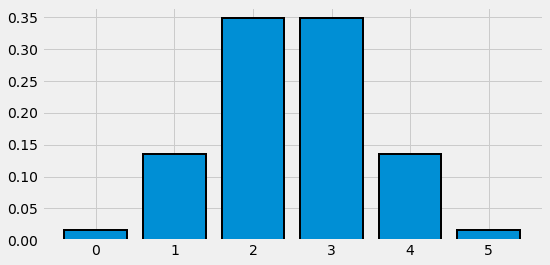

In [6]:
total_outcomes = 20
success_outcomes = 5
trials = 10
successes = np.arange(success_outcomes + 1)

plot_discrete_distribution(f = stats.hypergeom,
                           x_axis = successes,
                           M = total_outcomes,
                           N = success_outcomes,
                           n = trials)

---

#### RVS

Min: 0
Mean: 2.488
Median: 3.0
Max: 5
Variance: 0.989856
Standard Deviation: 0.9949150717523582


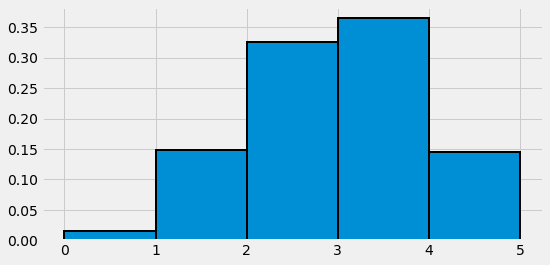

In [7]:
total_outcomes = 20
success_outcomes = 5
trials = 10

sample = sample_discrete_distribution(f = stats.hypergeom,
                                      size = 1000,
                                      M = total_outcomes,
                                      N = success_outcomes,
                                      n = trials,)

---

**[Esempio]** In una sacca ci sono 20 palline, 6 rosse e 14 gialle. Si estraggono 5 palline a caso *without replacement*. Qual è la probabilità che ci siano esattamente 4 palline rosse nelle 5 estratte?

I *trial* non sono indipendenti, perché l'estrazione di una palline influenza le probabilità delle estrazioni successive, quindi la distribuzione binomiale non può essere utilizzata!

In [8]:
total_outcomes = 20
success_outcomes = 6
trials = 5
desired_successes = 4

stats.hypergeom.pmf(M = total_outcomes,
                    N = success_outcomes,
                    n = trials,
                    k = desired_successes)

0.0135448916408669

Se invece l'estrazione fosse fatta *with replacement* avremmo potuto utilizzare la binomiale!

In [9]:
total_outcomes = 20
success_outcomes = 6
trials = 5
desired_successes = 4

stats.binom.pmf(n = trials,
                p = success_outcomes/total_outcomes,
                k = desired_successes)

0.028349999999999976

---

**[Esempio]** Nella popolazione ho 12 democrats, 24 republicans e 8 independents. Se estraggo un sample di 6 elementi a caso, qual è la probabilità che ci siano 3 democrats, 2 republicans e 1 independent?

Dobbiamo usare la formula della *PMF*, perché questo è uno scenario da **Multivariate Hypergeometric**. Al denominatore sicuramente c'è il coef. binomiale di 44 su 6, mentre al numeratore dobbiamo moltiplicare tre coef. in base allo scenario di successo.

Voglio tre democrats quindi mi serve il binomiale di 12 su 3; voglio 2 republicans quindi mi serve il binomiale di 24 su 2; infine per un indipendente serve il binomiale di 8 su 1.

In [10]:
num = scipy.special.binom(12, 3) * scipy.special.binom(24, 2) * scipy.special.binom(8, 1)
den = scipy.special.binom(44, 6)

num/den

0.06881377272755605

---